In [144]:
import numpy as np
import pandas as pd

# 3

### 3.0

In [145]:
# Create a list of characters from 'a' to 'z' and space
char_list = [chr(x) for x in range(ord('a'), ord('z')+1)] + [' ']
print(char_list)
smoothing = 0.5

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']


### 3.1 - Prior

In [146]:
prior = {}
for language in ["e","j","s"]:
    prior[language] = np.log((10+1/2)/((10+1/2)*3))

In [147]:
# Result
for l in prior:
    print(np.exp(prior[l]))
    

0.3333333333333333
0.3333333333333333
0.3333333333333333


### 3.2 and 3.3 - Conditional probabilities

In [148]:
dict_count = {}
for language in ["e","j","s"]:
    dict_count[language] = {}
    for character in char_list:
        dict_count[language][character] = smoothing
    for n in range(10):
        file = 'languageID/' + language + str(n) + '.txt'
        with open(file, 'r') as file:
            content = file.read()
            for c in content:
                if c in char_list:
                    dict_count[language][c] +=1
                else:
                    pass      

In [149]:
cond_probability = {}
for language in dict_count:
    cond_probability[language] = {}
    total = sum(dict_count[language].values())
    vector = []
    for c in dict_count[language]:
        c_count = dict_count[language][c]
        vector.append(round((c_count/total),4))
        cond_probability[language][c] = np.log(c_count/total)
    print(language)
    print(vector)
    print(sum(vector))
#cond_probability

e
[0.0602, 0.0111, 0.0215, 0.022, 0.1054, 0.0189, 0.0175, 0.0472, 0.0554, 0.0014, 0.0037, 0.029, 0.0205, 0.0579, 0.0645, 0.0168, 0.0006, 0.0538, 0.0662, 0.0801, 0.0267, 0.0093, 0.0155, 0.0012, 0.0138, 0.0006, 0.1792]
1.0
j
[0.1318, 0.0109, 0.0055, 0.0172, 0.0602, 0.0039, 0.014, 0.0318, 0.097, 0.0023, 0.0574, 0.0014, 0.0398, 0.0567, 0.0912, 0.0009, 0.0001, 0.0428, 0.0422, 0.057, 0.0706, 0.0002, 0.0197, 0.0, 0.0142, 0.0077, 0.1234]
0.9999
s
[0.1046, 0.0082, 0.0375, 0.0397, 0.1138, 0.0086, 0.0072, 0.0045, 0.0499, 0.0066, 0.0003, 0.0529, 0.0258, 0.0542, 0.0725, 0.0243, 0.0077, 0.0593, 0.0658, 0.0356, 0.0337, 0.0059, 0.0001, 0.0025, 0.0079, 0.0027, 0.1683]
1.0001


In [150]:
cond_probability

{'e': {'a': -2.8106061285981796,
  'b': -4.497664277973426,
  'c': -3.8392375661172182,
  'd': -3.8179601676699337,
  'e': -2.25028454131573,
  'f': -3.966861491611048,
  'g': -4.046758776467488,
  'h': -3.05301703039592,
  'i': -2.892985446502579,
  'j': -6.556547092632226,
  'k': -5.590359389613447,
  'l': -3.5412402159536045,
  'm': -3.8864161263923087,
  'n': -2.848663323404553,
  'o': -2.741649867702676,
  'p': -4.089236204734605,
  'q': -7.484533864269571,
  'r': -2.9220255997237423,
  's': -2.7153458726599693,
  't': -2.524160404954204,
  'u': -3.624423540055839,
  'v': -4.679392538992042,
  'w': -4.167144439879508,
  'x': -6.7623991468363736,
  'y': -4.27987628840365,
  'z': -7.373308229159347,
  ' ': -1.7189740299171272},
 'j': {'a': -2.0267306146406696,
  'b': -4.522033199719792,
  'c': -5.2055803065507185,
  'd': -4.061316937856336,
  'e': -2.810003875371097,
  'f': -5.552295910586692,
  'g': -4.267864684592458,
  'h': -3.449481017721548,
  'i': -2.332699624592227,
  'j': -6

### 3.4 - Test data

In [151]:
def test_bag(file):
    doc_dict = {}
    char_list = [chr(x) for x in range(ord('a'), ord('z')+1)] + [' ']
    for character in char_list:
        doc_dict[character] = 0
    with open(file, 'r') as file:
        content = file.read()
        for c in content:
            if c in char_list:
                doc_dict[c] +=1
            else:
                pass   
    return doc_dict

file = 'languageID/e10.txt'

# Result
vector = []
doc_dict = test_bag(file)
for c in doc_dict:
    vector.append(doc_dict[c])
    
print(vector)

[164, 32, 53, 57, 311, 55, 51, 140, 140, 3, 6, 85, 64, 139, 182, 53, 3, 141, 186, 225, 65, 31, 47, 4, 38, 2, 498]


In [152]:
doc_dict

{'a': 164,
 'b': 32,
 'c': 53,
 'd': 57,
 'e': 311,
 'f': 55,
 'g': 51,
 'h': 140,
 'i': 140,
 'j': 3,
 'k': 6,
 'l': 85,
 'm': 64,
 'n': 139,
 'o': 182,
 'p': 53,
 'q': 3,
 'r': 141,
 's': 186,
 't': 225,
 'u': 65,
 'v': 31,
 'w': 47,
 'x': 4,
 'y': 38,
 'z': 2,
 ' ': 498}

### 3.5 - Likelihood

In [153]:
def likelihood(doc_dict,cond_probability):        
    dict_likelihood = {}
    for language in ["e","j","s"]:
        likelihood_total = 0
        for c in cond_probability[language]:
            count = doc_dict[c]
            prob = cond_probability[language][c]
            likelihood_total += count*prob
        dict_likelihood[language] = likelihood_total
    return dict_likelihood

# Results
dict_likelihood =  likelihood(doc_dict,cond_probability)
for l in dict_likelihood:
    print(l, np.exp(dict_likelihood[l]))
        

e 0.0
j 0.0
s 0.0


In [154]:
dict_likelihood

{'e': -7841.865447060635, 'j': -8771.433079075032, 's': -8467.282044010557}

### 3.6 - Posterior

In [155]:
def bayes(prior,dict_likelihood):
    dict_bayes = {}
    for language in ["e","j","s"]:
        dict_bayes[language] = dict_likelihood[language] + prior[language]
    return dict_bayes

dict_bayes = bayes(prior,dict_likelihood)

# Results
for l in dict_bayes:
    print(l, np.exp(dict_bayes[l]))

e 0.0
j 0.0
s 0.0


In [156]:
dict_bayes

{'e': -7842.964059349303, 'j': -8772.5316913637, 's': -8468.380656299225}

### 3.7 - Performance

In [157]:
def prediction(dict_bayes):
    pred = max(dict_bayes, key=lambda k: dict_bayes[k])
    return pred 

In [158]:
# Run
dict_results = {}
for language in ["e","j","s"]:
    for n in range(10,20,1):
        file = 'languageID/' + language + str(n) + '.txt'
        doc_dict = test_bag(file)
        #print(doc_dict)
        dict_likelihood =  likelihood(doc_dict,cond_probability)
        dict_bayes = bayes(prior,dict_likelihood)
        #print(dict_bayes["e"]/dict_bayes["s"])
        pred = prediction(dict_bayes)
        truth = language
        dict_results[file] = (pred,truth)

dict_results

{'languageID/e10.txt': ('e', 'e'),
 'languageID/e11.txt': ('e', 'e'),
 'languageID/e12.txt': ('e', 'e'),
 'languageID/e13.txt': ('e', 'e'),
 'languageID/e14.txt': ('e', 'e'),
 'languageID/e15.txt': ('e', 'e'),
 'languageID/e16.txt': ('e', 'e'),
 'languageID/e17.txt': ('e', 'e'),
 'languageID/e18.txt': ('e', 'e'),
 'languageID/e19.txt': ('e', 'e'),
 'languageID/j10.txt': ('j', 'j'),
 'languageID/j11.txt': ('j', 'j'),
 'languageID/j12.txt': ('j', 'j'),
 'languageID/j13.txt': ('j', 'j'),
 'languageID/j14.txt': ('j', 'j'),
 'languageID/j15.txt': ('j', 'j'),
 'languageID/j16.txt': ('j', 'j'),
 'languageID/j17.txt': ('j', 'j'),
 'languageID/j18.txt': ('j', 'j'),
 'languageID/j19.txt': ('j', 'j'),
 'languageID/s10.txt': ('s', 's'),
 'languageID/s11.txt': ('s', 's'),
 'languageID/s12.txt': ('s', 's'),
 'languageID/s13.txt': ('s', 's'),
 'languageID/s14.txt': ('s', 's'),
 'languageID/s15.txt': ('s', 's'),
 'languageID/s16.txt': ('s', 's'),
 'languageID/s17.txt': ('s', 's'),
 'languageID/s18.txt

In [159]:
# Create Dataframe
final_df = pd.DataFrame()
for l1 in ["e","j","s"]: #["English True","Japanese True","Spanish True"]:
    for l2 in ["e","j","s"]: #["English Predicted","Japanese Predicted","Spanish Predicted"]:
        final_df.loc[l1,l2] = 0

for i in dict_results:
    l1 = dict_results[i][0] # predicted
    l2 = dict_results[i][1] # true
    final_df.loc[l1,l2] += 1

print(final_df)
    

      e     j     s
e  10.0   0.0   0.0
j   0.0  10.0   0.0
s   0.0   0.0  10.0


# 4.2

In [173]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt

### Functions

In [174]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# Cross-entropy loss function
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

# Compute derivatives for the sigmoid activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def accuracy_calculation(W1,W2,X_test,Y_test):
    z1 = np.dot(W1, X_test.T)
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1)
    y_hat = softmax(z2).astype(np.int32)
    pred = y_hat.T
    
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(pred)):
        index = np.where(pred[i] == 1)
        index2 = np.where(Y_test[i] == 1)
        if index == index2:
            TP +=1
    accuracy = (TP) / len(pred)   
    return accuracy        

In [175]:
# Model Function
# Disclaimer: I am simplifiin the derivative of the loss and the softmax (line 41)
def model_nn(lr, k, d1, batch_size, X_train, Y_train, epochs, X_test,Y_test, random):
    learning_rate = lr
    np.random.seed(10)
    d = X_train.shape[1] # dimentions of the data # flatening images
    output_size = k
    # different weights initialization
    if random == 0:
        W1 = np.random.rand(d1, d) # Initialize W1 randomly (-1,1)
        W2 = np.random.rand(k, d1)
    elif random == 1:    
        W1 = 2 * np.random.rand(d1, d) -1 # Initialize W1 randomly (-1,1)
        W2 = 2 * np.random.rand(k, d1) -1
    elif random == 2:
        W1 = np.zeros((d1, d))  # Initialize W1 zeros
        W2 = np.zeros((k, d1))
    num_batches = len(X_train) // batch_size
    loss_list = []
    accuracy_list = []
    error_list = []
    for epoch in range(epochs):
        total_loss = 0
        for batch in range(num_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            # Batch data
            X_batch = X_train[start_idx:end_idx]
            Y_batch = Y_train[start_idx:end_idx]
            
            # Forward (for the entire batch)
            z1 = np.dot(W1, X_batch.T)
            a1 = sigmoid(z1)
            z2 = np.dot(W2, a1)
            y_hat = softmax(z2)
    
            # Loss Computation
            loss = cross_entropy_loss(Y_batch, y_hat.T)
            total_loss += loss
            
            # Backward pass (compute derivatives)
            delta2 = y_hat.T - Y_batch
            delta1 = np.dot(W2.T, delta2.T) * sigmoid_derivative(z1)
            
            grad_W2 = np.dot(delta2.T, a1.T)
            grad_W1 = np.dot(delta1, X_batch)
            
            # Update weights and biases
            W2 -= learning_rate * grad_W2
            W1 -= learning_rate * grad_W1

        accuracy = accuracy_calculation(W1,W2,X_test,Y_test)
        accuracy_list.append(accuracy)
        error_list.append(1-accuracy)
        
        # Compute average loss for this epoch
        average_loss = total_loss / num_batches
        loss_list.append(average_loss)
        
        # Print the loss every 1000 epochs
        if epoch % 10 == 0:
            print(f'Epoch: {epoch}, Loss: {average_loss}, Error: {1-accuracy}, Accuracy: {accuracy}')  

    plt.figure(figsize=(10, 6))  # Set the size of the plot (optional)
    plt.plot(loss_list, marker='o', linestyle='-', color='b')
    plt.xlabel('Index')
    plt.ylabel('Loss')
    plt.title('Learning Curve (Loss)')
    plt.grid(True)  # Show grid (optional)
    plt.savefig('learning_curve.png')
    plt.show()  # Display the plot

    plt.figure(figsize=(10, 6))  # Set the size of the plot (optional)
    plt.plot(error_list, marker='o', linestyle='-', color='b')
    plt.xlabel('Index')
    plt.ylabel('Error')
    plt.title('Learning Curve (Error)')
    plt.grid(True)  # Show grid (optional)
    plt.savefig('error.png')
    plt.show()  # Display the plot
    
    return loss_list, error_list

### Data

In [176]:
k = 10
data = pd.read_csv("train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
Y_test = to_categorical(Y_dev, num_classes=k).astype(np.int32)
X_dev = data_dev[1:n]
X_dev = X_dev / 255.
X_test = X_dev.T

data_train = data[1000:m].T
Y_train = data_train[0]
Y_train = to_categorical(Y_train, num_classes=k).astype(np.int32)

X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
X_train = X_train.T

# 4.2

C:\Users\clandriola\AppData\Local\Temp\ipykernel_10556\638843477.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\clandriola\AppData\Local\Temp\ipykernel_10556\638843477.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if index == index2:


Epoch: 0, Loss: 22.960075464831043, Error: 0.727, Accuracy: 0.273
Epoch: 10, Loss: 9.40733495518963, Error: 0.4, Accuracy: 0.6
Epoch: 20, Loss: 6.5727678179240225, Error: 0.31999999999999995, Accuracy: 0.68
Epoch: 30, Loss: 6.085271333079694, Error: 0.256, Accuracy: 0.744
Epoch: 40, Loss: 5.38983995495737, Error: 0.29300000000000004, Accuracy: 0.707
Epoch: 50, Loss: 4.790519242372381, Error: 0.21899999999999997, Accuracy: 0.781
Epoch: 60, Loss: 4.763048218998166, Error: 0.33599999999999997, Accuracy: 0.664
Epoch: 70, Loss: 4.0320882955307535, Error: 0.20199999999999996, Accuracy: 0.798
Epoch: 80, Loss: 4.107205903681207, Error: 0.21799999999999997, Accuracy: 0.782
Epoch: 90, Loss: 3.8160664469876777, Error: 0.20599999999999996, Accuracy: 0.794
Epoch: 100, Loss: 4.021375784424415, Error: 0.19899999999999995, Accuracy: 0.801
Epoch: 110, Loss: 3.4366599057485, Error: 0.20399999999999996, Accuracy: 0.796
Epoch: 120, Loss: 3.6153292845432183, Error: 0.239, Accuracy: 0.761
Epoch: 130, Loss: 

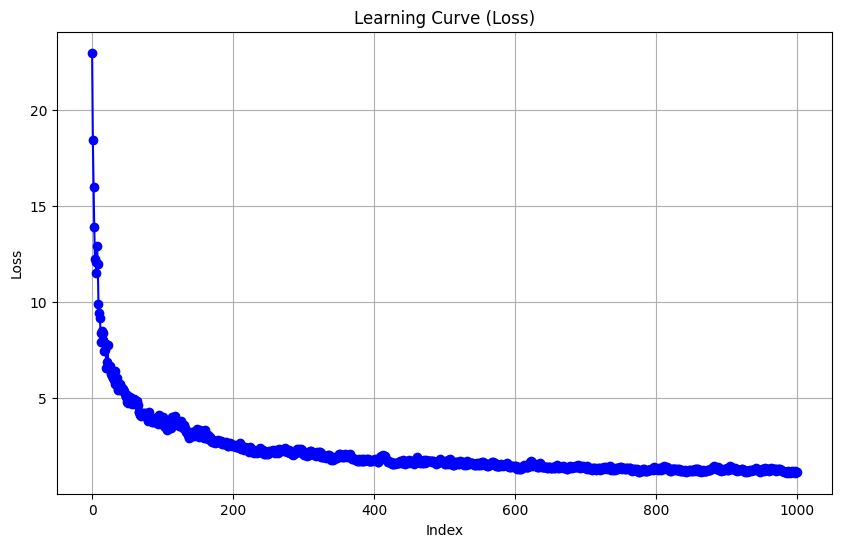

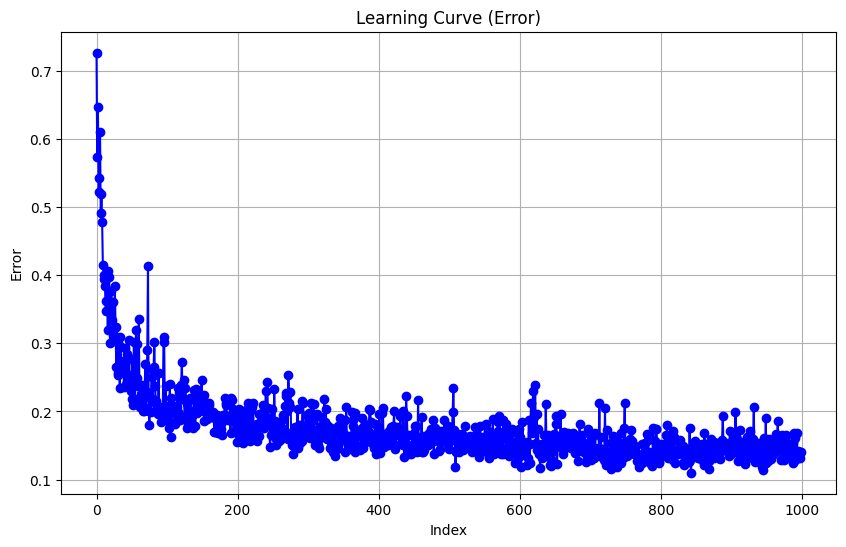

In [178]:
lr = 0.5
d1 = 300
batch_size = 64 #X_train.shape[0] # 1 is SGD/ 60000 is Full GD
epochs = 1000
random = 1
loss_list_4_4, accuracy_list_4_4 = model_nn(lr, k, d1, batch_size, X_train, Y_train, epochs, X_test, Y_test, random)

# 4.3

In [161]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Create and train the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(300,), max_iter=1000, random_state=42, activation='logistic',solver='sgd',batch_size = 64, learning_rate='constant', learning_rate_init=0.5)
model.fit(X_train, Y_train)

# Get the loss after each iteration
loss_values = model.loss_curve_
print("Loss after each iteration:", loss_values)

Loss after each iteration: [2.835593716190042, 2.4103815540147115, 1.9606860930532748, 1.1610376021717652, 0.9644289408410959, 0.9149161802851454, 0.8755222246480788, 0.8089621368790888, 0.7949262658649301, 0.7798047435730352, 0.7557813828815895, 0.7213839666576743, 0.6749974075389038, 0.628944507916068, 0.6120845826664951, 0.6034769313873233, 0.5762951584030623, 0.5482061272601154, 0.5320020391862513, 0.5186430986681078, 0.5115112870655625, 0.4885605717065937, 0.46451645576381845, 0.43724862438763396, 0.4118543497232719, 0.3981815799014543, 0.3772403621467807, 0.37091862253686314, 0.35590251406376006, 0.3479783467455921, 0.33414288687498583, 0.3290867247997753, 0.3203341627278411, 0.31342844359355476, 0.3148796152593173, 0.3022575664321788, 0.2968157531059424, 0.2847904375386546, 0.28285529504511114, 0.2727692598826984, 0.2691953567981568, 0.26542711941720337, 0.2683259251615, 0.25777479375622636, 0.2504393658233515, 0.24407575200038392, 0.2374676409316023, 0.2340005536129932, 0.23181

In [181]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.93


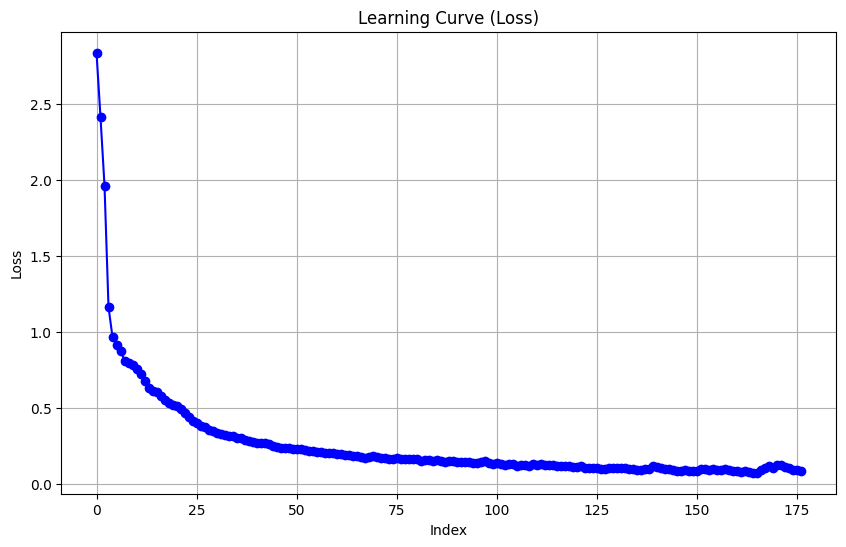

In [180]:
    plt.figure(figsize=(10, 6))  # Set the size of the plot (optional)
    plt.plot(loss_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Index')
    plt.ylabel('Loss')
    plt.title('Learning Curve (Loss)')
    plt.grid(True)  # Show grid (optional)
    plt.savefig('error.png')
    plt.show()  # Display the plot

# 4.4

C:\Users\clandriola\AppData\Local\Temp\ipykernel_10556\638843477.py:32: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if index == index2:


Epoch: 0, Loss: 2.3478947508298456, Error: 1.0, Accuracy: 0.0


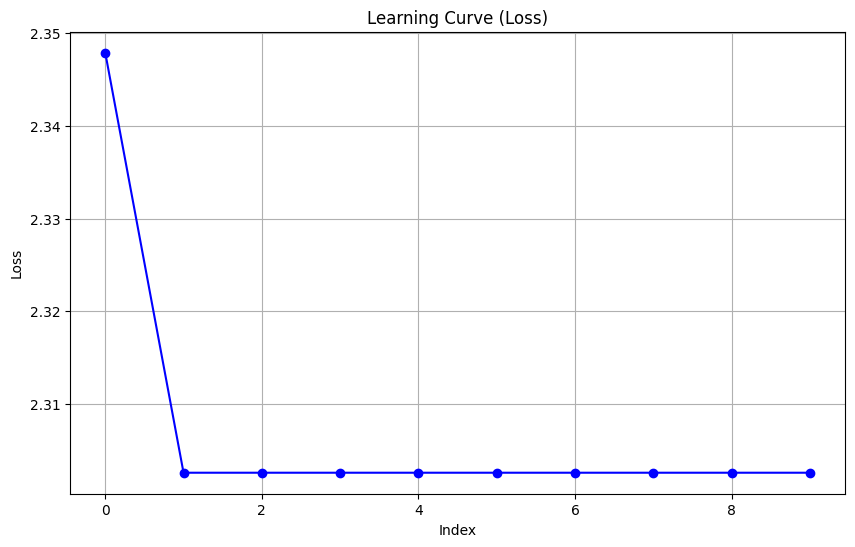

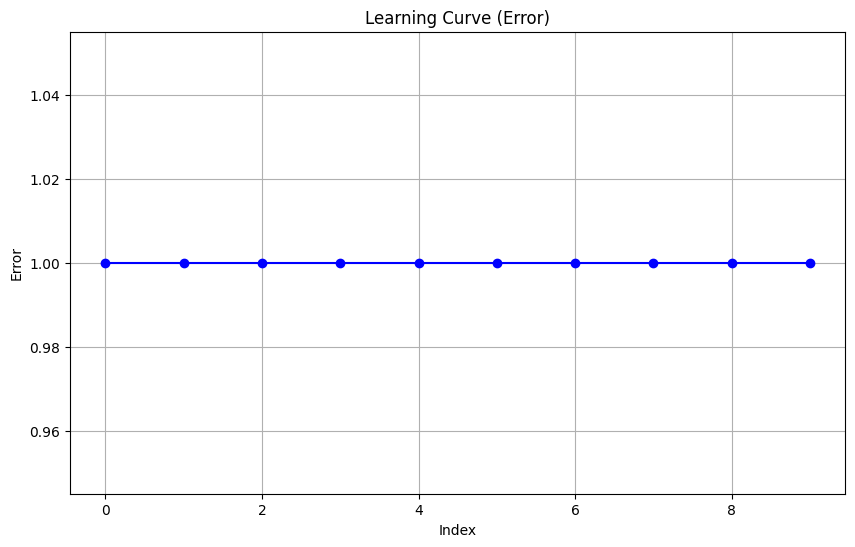

In [182]:
lr = 0.5
d1 = 300
batch_size = 64 #X_train.shape[0] # 1 is SGD/ 60000 is Full GD
epochs = 10
random = 2
loss_list44, error_list44 = model_nn(lr, k, d1, batch_size, X_train, Y_train, epochs, X_test, Y_test, random)

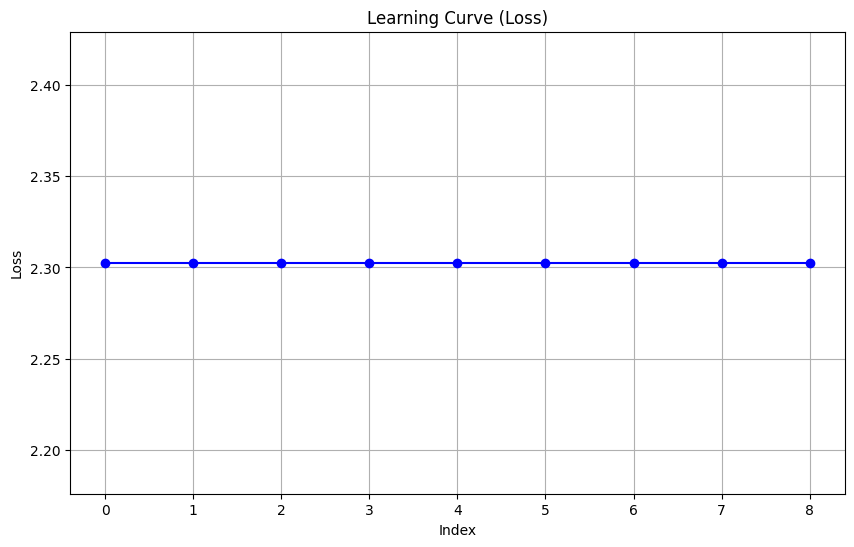

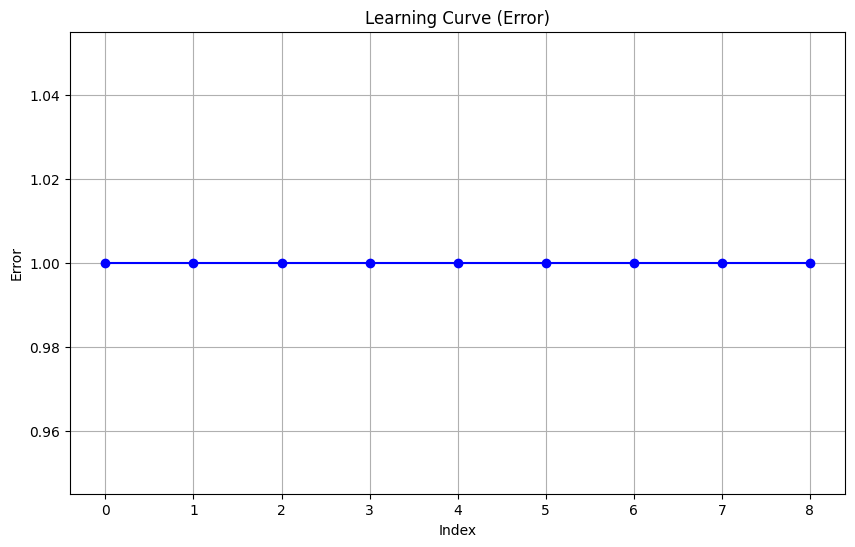

In [183]:
    plt.figure(figsize=(10, 6))  # Set the size of the plot (optional)
    plt.plot(loss_list44[1:], marker='o', linestyle='-', color='b')
    plt.xlabel('Index')
    plt.ylabel('Loss')
    plt.title('Learning Curve (Loss)')
    plt.grid(True)  # Show grid (optional)
    plt.savefig('learning_curve.png')
    plt.show()  # Display the plot

    plt.figure(figsize=(10, 6))  # Set the size of the plot (optional)
    plt.plot(error_list44[1:], marker='o', linestyle='-', color='b')
    plt.xlabel('Index')
    plt.ylabel('Error')
    plt.title('Learning Curve (Error)')
    plt.grid(True)  # Show grid (optional)
    plt.savefig('error.png')
    plt.show()  # Display the plot